# Установка библиотеки retentioneering
Если вы работаете через google colab, то установку Retentioneering нужно будет выполнять каждый раз при запуске ноутбука. 
Если локально - то только 1 раз.

Чтобы установить библиотеку:
- Раскомментируйте строчку в следующей ячейке и выполните её 
- После того как она выполнится - перезагрузите ядро. 
- Для этого в google colab нужно нажать: Runtime -- Restart runtime (Среда выполнения - Перезапустить среду выполнения)
- В Jupyter Notebook нужно нажать: Kernel -- Restart (Ядро -- Перезапуск)

После перезапуска ядра (среды) можно продолжить работу с ноутбуком, начиная с ячейки с импортами

In [1]:
#!pip3 install retentioneering

In [1]:
import pandas as pd
import retentioneering
import numpy as np
import datetime as dt
from copy import deepcopy

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
import io
%matplotlib inline

# Подготовка данных

In [2]:
grA = pd.read_csv('A_group.csv')
grB = pd.read_csv('B_group.csv')



In [3]:
a_list = grA['CustomerID'].unique()
a_list

array([14957., 13918., 17212., ..., 13298., 14569., 12713.])

In [4]:
data = grA.merge(grB, how = 'outer', on='CustomerID')
data.to_csv('mergedA1B1.csv', index=False)

In [5]:
data.loc[data.CustomerID.isin(a_list), 'group'] = 'A'
data.loc[~data.CustomerID.isin(a_list), 'group'] = 'B'

In [6]:
data.head()

,Unnamed: 0_x,InvoiceNo_x,StockCode_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID,Unnamed: 0_y,InvoiceNo_y,StockCode_y,Quantity_y,InvoiceDate_y,UnitPrice_y,group
0,142009.0,548541,21231,4.0,2011-03-31 17:59:00,1.25,14957.0,NaN,NaN,NaN,NaN,NaN,NaN,A
1,142010.0,548541,22970,6.0,2011-03-31 17:59:00,2.55,14957.0,NaN,NaN,NaN,NaN,NaN,NaN,A
2,142011.0,548541,21164,1.0,2011-03-31 17:59:00,2.95,14957.0,NaN,NaN,NaN,NaN,NaN,NaN,A
3,142012.0,548541,82578,1.0,2011-03-31 17:59:00,0.55,14957.0,NaN,NaN,NaN,NaN,NaN,NaN,A
4,142013.0,548541,82580,1.0,2011-03-31 17:59:00,0.55,14957.0,NaN,NaN,NaN,NaN,NaN,NaN,A


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0_x   116786 non-null  float64
 1   InvoiceNo_x    116786 non-null  object 
 2   StockCode_x    116786 non-null  object 
 3   Quantity_x     116786 non-null  float64
 4   InvoiceDate_x  116786 non-null  object 
 5   UnitPrice_x    116786 non-null  float64
 6   CustomerID     406829 non-null  float64
 7   Unnamed: 0_y   425123 non-null  float64
 8   InvoiceNo_y    425123 non-null  object 
 9   StockCode_y    425123 non-null  object 
 10  Quantity_y     425123 non-null  float64
 11  InvoiceDate_y  425123 non-null  object 
 12  UnitPrice_y    425123 non-null  float64
 13  group          541909 non-null  object 
dtypes: float64(7), object(7)
memory usage: 62.0+ MB


In [8]:
data['Unnamed: 0_x'] = data['Unnamed: 0_x'].combine_first(data['Unnamed: 0_y'])
data['InvoiceNo_x'] = data['InvoiceNo_x'].combine_first(data['InvoiceNo_y'])
data['StockCode_x'] = data['StockCode_x'].combine_first(data['StockCode_y'])
data['Quantity_x'] = data['Quantity_x'].combine_first(data['Quantity_y'])
data['InvoiceDate_x'] = data['InvoiceDate_x'].combine_first(data['InvoiceDate_y'])
data['UnitPrice_x'] = data['UnitPrice_x'].combine_first(data['UnitPrice_y'])



data.rename(columns={'Unnamed: 0_x': 'Unnamed: 0', 'InvoiceNo_x': 'InvoiceNo', 'StockCode_x': 'StockCode', 'Quantity_x':'Quantity', 'InvoiceDate_x': 'InvoiceDate', 'UnitPrice_x':'UnitPrice'}, inplace=True)



In [9]:
data.drop(columns={'Unnamed: 0_y', 'InvoiceNo_y', 'StockCode_y', 'Quantity_y', 'InvoiceDate_y', 'UnitPrice_y'}, inplace=True)

In [10]:
data.head()

,Unnamed: 0,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,group
0,142009.0,548541,21231,4.0,2011-03-31 17:59:00,1.25,14957.0,A
1,142010.0,548541,22970,6.0,2011-03-31 17:59:00,2.55,14957.0,A
2,142011.0,548541,21164,1.0,2011-03-31 17:59:00,2.95,14957.0,A
3,142012.0,548541,82578,1.0,2011-03-31 17:59:00,0.55,14957.0,A
4,142013.0,548541,82580,1.0,2011-03-31 17:59:00,0.55,14957.0,A


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541909 non-null  float64
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Quantity     541909 non-null  float64
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   group        541909 non-null  object 
dtypes: float64(4), object(4)
memory usage: 37.2+ MB


In [12]:
data['date'] = pd.to_datetime(data['InvoiceDate'])

In [13]:
data['date'].min(), data['date'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

# Изучение данных

In [14]:
data.groupby(['CustomerID', 'group']).nunique().reset_index()['group'].value_counts()

A    2187
B    2185
Name: group, dtype: int64

Количество пользователей в обеих группах практически одинаковое. Теперь проверим не перетекают ли пользователи между группами.

In [15]:
data.groupby(['CustomerID'])['group'].nunique().sort_values()

CustomerID
12346.0    1
16272.0    1
16274.0    1
16275.0    1
16276.0    1
          ..
14307.0    1
14306.0    1
14305.0    1
14314.0    1
18287.0    1
Name: group, Length: 4372, dtype: int64

Пользователи не пересекаются между группами. Теперь посмотрим диапазоны дат для каждой из групп.

In [16]:
gr=['A', 'B']
for i in gr:
    print(i)
    print(data[data['group']==i]['date'].min(), data[data['group']==i]['date'].max())

A
2011-03-31 17:59:00 2011-12-09 12:50:00
B
2010-12-01 08:26:00 2011-12-09 12:49:00


Наблюдение за группой B начинается с 1 декабря, тогда как за группой А на четыре месяца позже, с 31 марта 2011.

Можем сравнить поведение групп между собой.

Например, можем построить, как изменялась доля активных пользователей в каждой из групп интервал к интервалу с момента начала наблюдения за обеими группами:



In [17]:
cohort_size =  7

data_grA = data[data['CustomerID'].isin(a_list)].copy()
data_grB = data[~data['CustomerID'].isin(a_list)].copy()

In [18]:
data_grA['delta'] = (data_grA['date'] - data_grA['date'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))


data_grB['delta'] = (data_grB['date'] - data_grA['date'].min())\
                    .apply(lambda x: np.floor(x.days / cohort_size))

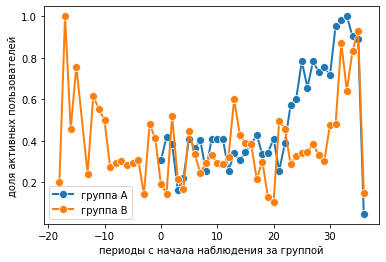

In [19]:
retention_grA =  data_grA.groupby('delta')['CustomerID'].apply(lambda x: len(set(x)))
retention_grB =  data_grB.groupby('delta')['CustomerID'].apply(lambda x: len(set(x)))


sns.lineplot(x = retention_grA.index, y = retention_grA.values/max(retention_grA.values),
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = retention_grB.index, y = retention_grB.values/max(retention_grB.values),
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за группой')
plt.ylabel('доля активных пользователей')

plt.legend(labels=["группа А","группа B"])
plt.show()

Мы видим, что группа А и B обладают примерно таким же retention, c небольшим повышением в группе A на промежутке между 20 и 30 неделями наблюдения.

In [20]:
purch_grA =  data_grA.groupby('delta').apply(lambda x: len(x['InvoiceNo'])/x['CustomerID'].nunique())
purch_grB =  data_grB.groupby('delta').apply(lambda x: len(x['InvoiceNo'])/x['CustomerID'].nunique())

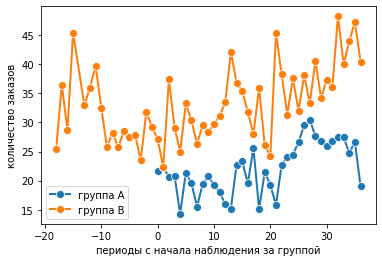

In [21]:
sns.lineplot(x = purch_grA.index, y = purch_grA.values,
             lw = 2, marker="o", markersize = 8)

sns.lineplot(x = purch_grB.index, y = purch_grB.values,
             lw = 2, marker="o", markersize = 8)

plt.xlabel('периоды с начала наблюдения за группой')
plt.ylabel('количество заказов')

plt.legend(labels=["группа A","группа B"])
plt.show()

Видно, что в группе B создавалось большее количество заказов на одного пользователя, чем в группе А.

In [22]:
data['UnitPrice'].value_counts()

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
4.48          1
87.40         1
545.25        1
0.48          1
221.16        1
Name: UnitPrice, Length: 1630, dtype: int64

In [23]:
def visualize_purchases(df):
    data = df.copy()
    min_date = data['date'].min()
    max_date = data['date'].max()

    data['delta'] = (data['date'] - min_date).apply(lambda x: np.floor(x.days/7))


    sns.set(style='white', context='notebook', rc={'figure.figsize':(8,5)})
    bin_num=int(np.floor((max_date-min_date).days/7))
    
    sns.distplot(data['delta'], kde=False,bins=bin_num, norm_hist=False, label='')
    plt.xlabel('Недели с начала наблюдения за группой')

    plt.legend(labels=["Все заказы в эту неделю"])
    plt.xlim([0,53])
    plt.show()
    print('начало наблюдения за группой: '+ str(min_date))

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


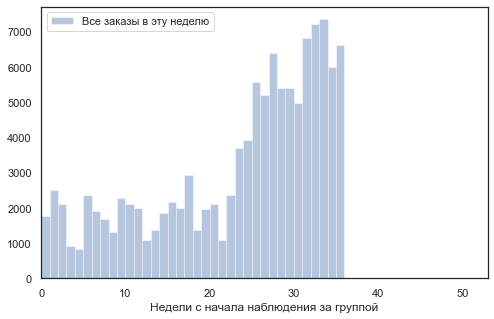

начало наблюдения за группой: 2011-03-31 17:59:00


In [24]:
visualize_purchases(data_grA)

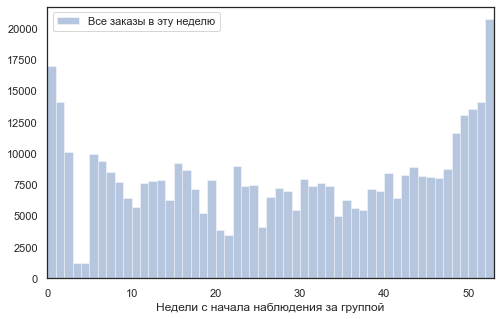

начало наблюдения за группой: 2010-12-01 08:26:00


In [25]:
visualize_purchases(data_grB)

На графиках сверху также видно, что количество заказов существенно выше в группе B.

Вероятно, имеет смысл повторить тест, так как наблюдение за группой B начинается с 1 декабря, тогда как за группой А на четыре месяца позже, с 31 марта 2011.